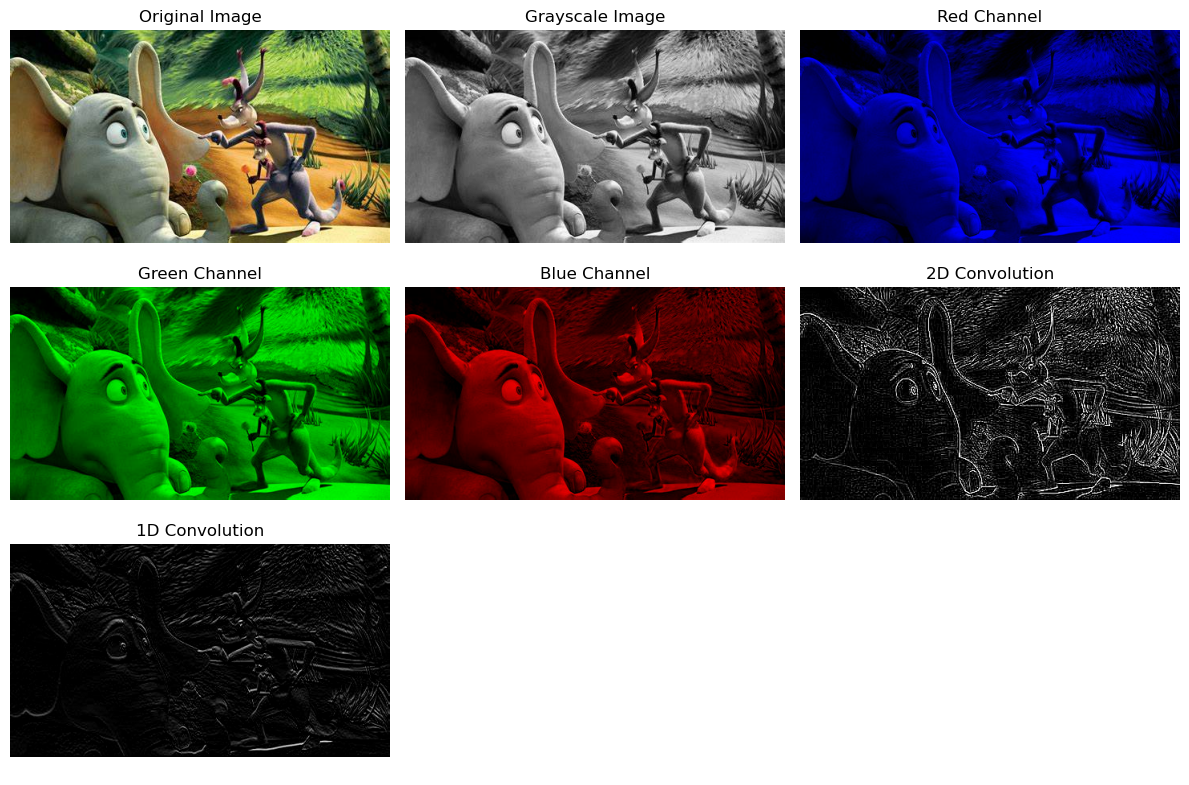

In [14]:
#1
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to RGB immediately
image = cv2.imread("OIP.jpg")
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Split channels
b, g, r = cv2.split(image)
zeros = np.zeros_like(b)

# Create color channel images
red_img   = cv2.merge([zeros, zeros, r])
green_img = cv2.merge([zeros, g, zeros])
blue_img  = cv2.merge([b, zeros, zeros])

# Apply convolution filters
kernel_2d = np.array([[1, 1, 1],
                      [1, -8, 1],
                      [1, 1, 1]])
conv2d = cv2.filter2D(gray, -1, kernel_2d)

kernel_1d = np.array([1, 0, -1])
conv1d = cv2.filter2D(gray, -1, kernel_1d)

# Plotting in 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

# Original Image
axes[0, 0].imshow(rgb_image)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Grayscale Image
axes[0, 1].imshow(gray, cmap='gray')
axes[0, 1].set_title('Grayscale Image')
axes[0, 1].axis('off')

# Red Channel
axes[0, 2].imshow(red_img)
axes[0, 2].set_title('Red Channel')
axes[0, 2].axis('off')

# Green Channel
axes[1, 0].imshow(green_img)
axes[1, 0].set_title('Green Channel')
axes[1, 0].axis('off')

# Blue Channel
axes[1, 1].imshow(blue_img)
axes[1, 1].set_title('Blue Channel')
axes[1, 1].axis('off')

# 2D Convolution
axes[1, 2].imshow(conv2d, cmap='gray')
axes[1, 2].set_title('2D Convolution')
axes[1, 2].axis('off')

# 1D Convolution
axes[2, 0].imshow(conv1d, cmap='gray')
axes[2, 0].set_title('1D Convolution')
axes[2, 0].axis('off')

# Leave the last two plots empty
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.tight_layout()
plt.show()


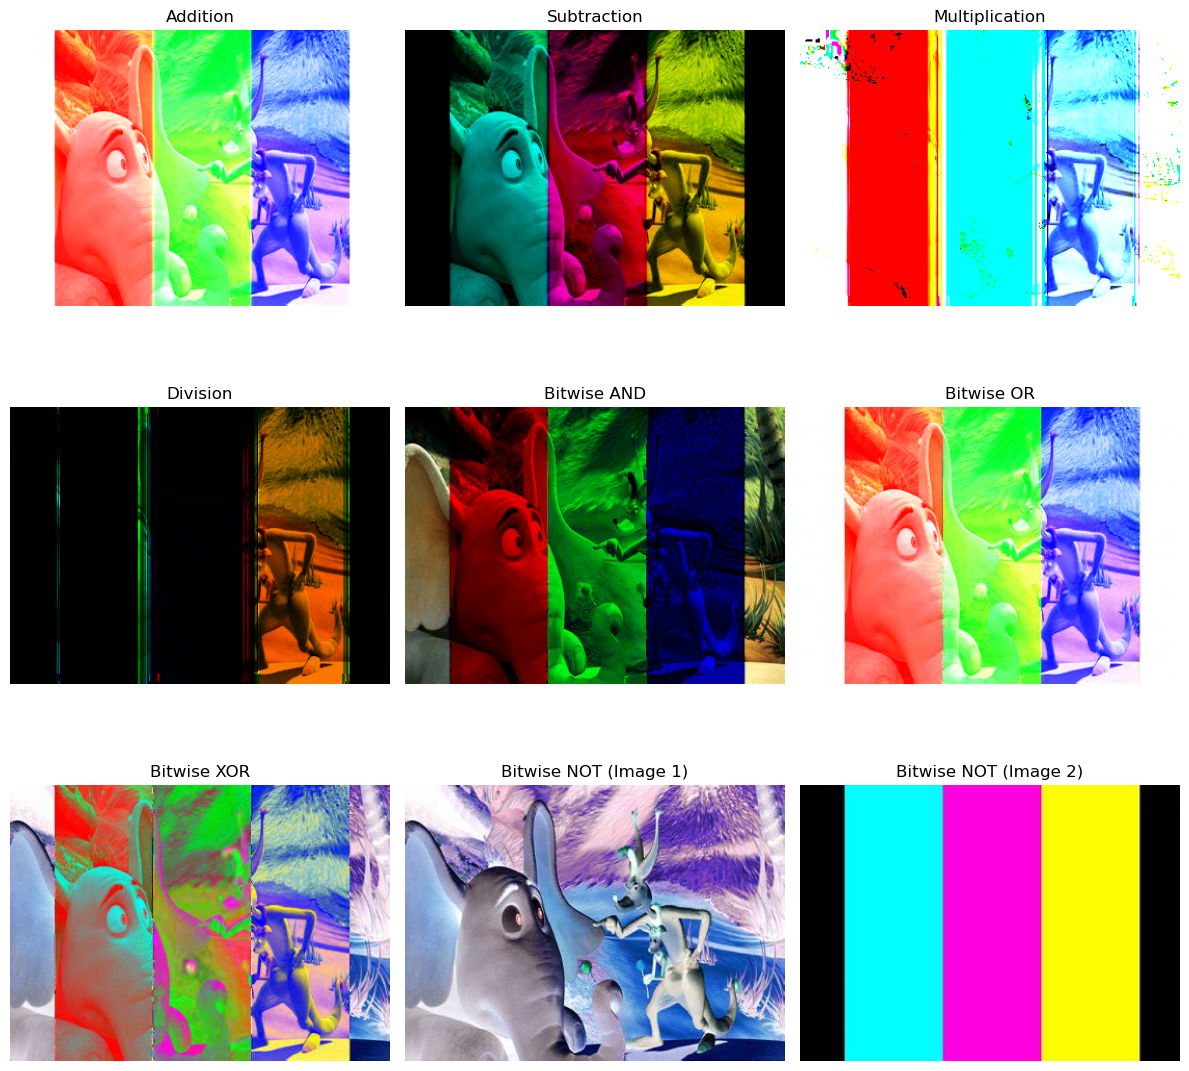

In [12]:
#2
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images and convert to RGB
img1 = cv2.imread('OIP.JPG')
img2 = cv2.imread('colorful.JPG')

# Convert to RGB right after reading
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Resize images to the same size
height, width = min(img1.shape[0], img2.shape[0]), min(img1.shape[1], img2.shape[1])
img1 = cv2.resize(img1, (width, height))
img2 = cv2.resize(img2, (width, height))

# Perform arithmetic and logical operations
add = cv2.add(img1, img2)
subtract = cv2.subtract(img1, img2)
multiply = cv2.multiply(img1, img2)
divide = cv2.divide(img1, img2)

bitwise_and = cv2.bitwise_and(img1, img2)
bitwise_or = cv2.bitwise_or(img1, img2)
bitwise_xor = cv2.bitwise_xor(img1, img2)
bitwise_not_img1 = cv2.bitwise_not(img1)
bitwise_not_img2 = cv2.bitwise_not(img2)

# Titles and corresponding images

# Create a 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Display each image in the subplots manually
axes[0, 0].imshow(add)
axes[0, 0].set_title('Addition')
axes[0, 0].axis('off')

axes[0, 1].imshow(subtract)
axes[0, 1].set_title('Subtraction')
axes[0, 1].axis('off')

axes[0, 2].imshow(multiply)
axes[0, 2].set_title('Multiplication')
axes[0, 2].axis('off')

axes[1, 0].imshow(divide)
axes[1, 0].set_title('Division')
axes[1, 0].axis('off')

axes[1, 1].imshow(bitwise_and)
axes[1, 1].set_title('Bitwise AND')
axes[1, 1].axis('off')

axes[1, 2].imshow(bitwise_or)
axes[1, 2].set_title('Bitwise OR')
axes[1, 2].axis('off')

axes[2, 0].imshow(bitwise_xor)
axes[2, 0].set_title('Bitwise XOR')
axes[2, 0].axis('off')

axes[2, 1].imshow(bitwise_not_img1)
axes[2, 1].set_title('Bitwise NOT (Image 1)')
axes[2, 1].axis('off')

axes[2, 2].imshow(bitwise_not_img2)
axes[2, 2].set_title('Bitwise NOT (Image 2)')
axes[2, 2].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


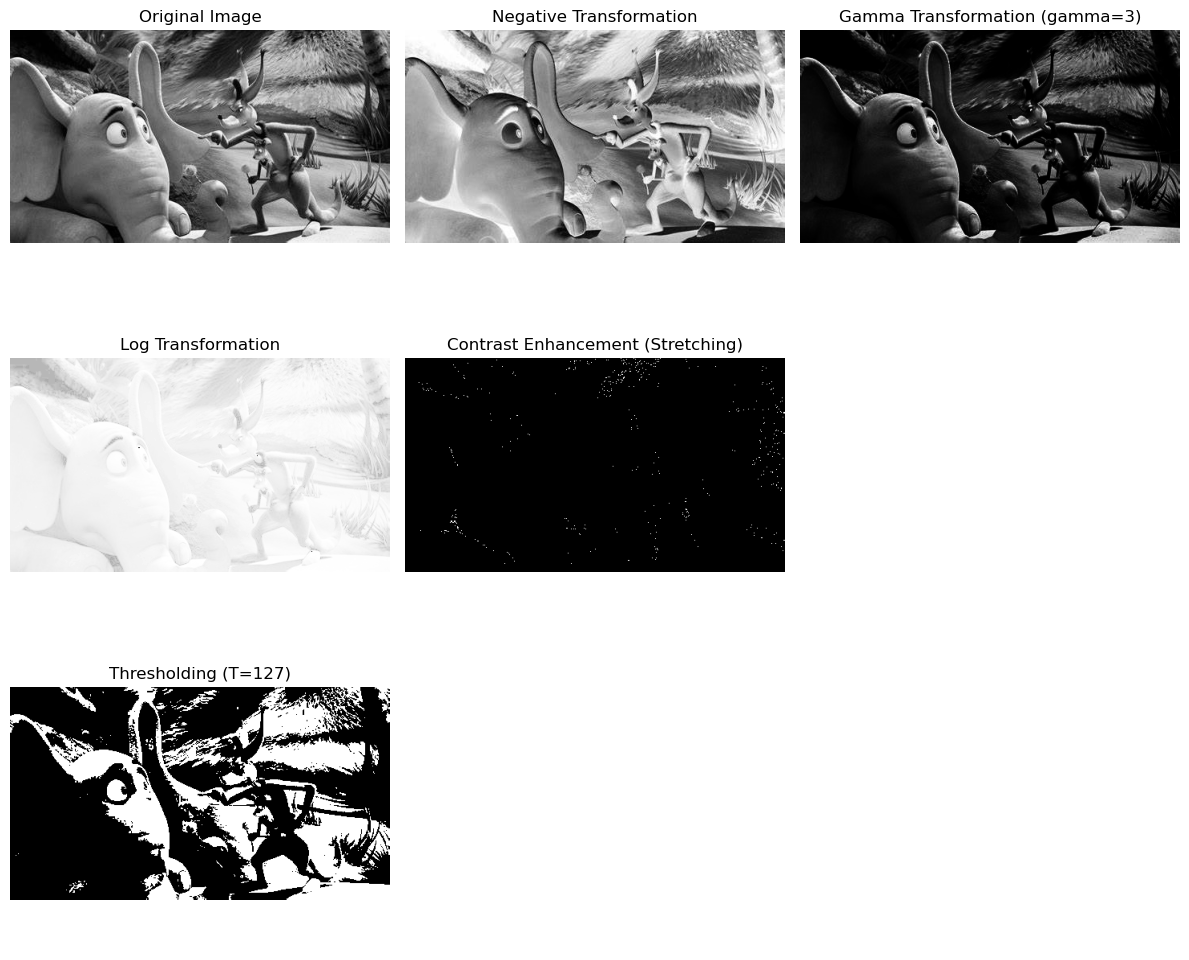

In [49]:
#3 


# Load an image in grayscale (feel free to replace with your own image)

# --- Negative Transformation ---
# This inverts the pixel intensities, making dark pixels bright and vice versa.
# Formula: I_out = L - 1 - I_in, where L is the max intensity (255 for 8-bit images)


# --- Gamma Transformation ---
# Gamma transformation adjusts brightness using a non-linear mapping function.
# Formula: I_out = c * (I_in / 255) ** gamma
# If gamma < 1 -> enhances dark regions (brightens the image)
# If gamma > 1 -> enhances bright regions (darkens the image)
# gamma = 3  # Try different values like 0.5, 1, 2, 3
# gamma_transformed = np.array(255 * (image / 255) ** gamma, dtype=np.uint8)

# --- Log Transformation ---
# Expands dark pixel values and compresses bright ones.
# Formula: I_out = c * log(1 + I_in)
# c = 255 / np.log(1 + np.max(image))  # Normalize constant based on the maximum pixel value
# log_transformed = c * np.log(1 + image)

# --- Contrast Enhancement (Contrast Stretching) ---
# Expands intensity range to improve contrast.
# Formula: I_out = (I_in - min(I)) * (255 / (max(I) - min(I)))
# contrast_stretched = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)


# --- Thresholding ---
# Converts an image to binary form based on a threshold.
# # If pixel value > threshold, set to max (255), else set to min (0)
# thresh_value = 127  # Change threshold value as needed
# _, thresholded_image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY)

# --- Visualizing the Transformations using Matplotlib ---
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load an image in grayscale (feel free to replace with your own image)
image = cv2.imread('OIP.jpg')  # Default is BGR

# Convert the BGR image to grayscale using cv2.cvtColor
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# --- Negative Transformation ---
negative_transformed = 255 - image

# --- Gamma Transformation ---
gamma = 3  # Try different values like 0.5, 1, 2, 3
gamma_transformed = np.array(255 * (image / 255) ** gamma, dtype=np.uint8)

# --- Log Transformation ---
c = 255 / np.log(1 + np.max(image))  # Normalize constant based on the maximum pixel value
log_transformed = c * np.log(1 + image + 1e-5)

# --- Contrast Enhancement (Contrast Stretching) ---
contrast_stretched = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# --- Thresholding ---
thresh_value = 127  # Change threshold value as needed
_, thresholded_image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY)

# --- Visualizing the Transformations using Matplotlib ---
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Original Image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Negative Transformation
axes[0, 1].imshow(negative_transformed, cmap='gray')
axes[0, 1].set_title('Negative Transformation')
axes[0, 1].axis('off')

# Gamma Transformation
axes[0, 2].imshow(gamma_transformed, cmap='gray')
axes[0, 2].set_title(f'Gamma Transformation (gamma={gamma})')
axes[0, 2].axis('off')

# Log Transformation
axes[1, 0].imshow(log_transformed, cmap='gray')
axes[1, 0].set_title('Log Transformation')
axes[1, 0].axis('off')

# Contrast Enhancement (Stretching)
axes[1, 1].imshow(contrast_stretched, cmap='gray')
axes[1, 1].set_title('Contrast Enhancement (Stretching)')
axes[1, 1].axis('off')

# Thresholding
axes[2, 0].imshow(thresholded_image, cmap='gray')
axes[2, 0].set_title(f'Thresholding (T={thresh_value})')
axes[2, 0].axis('off')

# Leave the last plots empty
axes[1, 2].axis('off')
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.tight_layout()
plt.show()


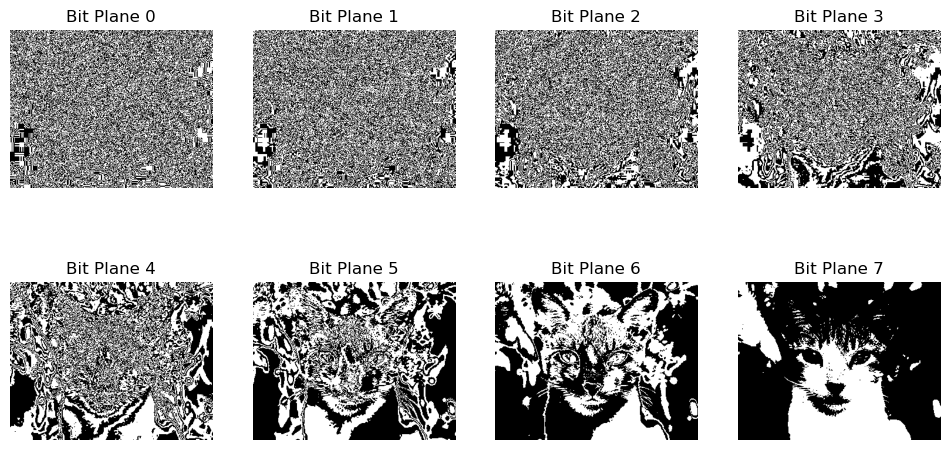

In [23]:

#4

import cv2
import numpy as np
import matplotlib.pyplot as plt
"""
Each pixel in an 8-bit grayscale image is represented using 8 bits (values from 0 to 255).
 The technique helps in analyzing which bits contribute most to image clarity and which bits 
 contain noise or fine det
 
 Higher-order bits (MSB - Most Significant Bits) contain more structural information.
Lower-order bits (LSB - Least Significant Bits) contain fine details and often noise.
Extracting bit planes separately allows us to analyze and reconstruct an image with just
 a few significant bits.
 

 Consider a grayscale pixel value 235, its 8-bit binary representation is:
235 = 1 1 1 0 1 0 1 1
The leftmost bits (1 1 1 0) contribute most to the brightness.
The rightmost bits (1 0 1 1) contribute to fine details.
 """
# Load grayscale image
# Load an image in grayscale (feel free to replace with your own image)
image = cv2.imread('OIP.jpg')  # Default is BGR

# Convert the BGR image to grayscale using cv2.cvtColor
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Ensure the image is loaded
if img is None:
    raise FileNotFoundError("Image not found! Check the file path.")

bit_planes = []  

# Extract 8 bit-planes one by one
for i in range(8):  
    bit_plane = (img & (1 << i)) >> i  # Mask and shift to extract the i-th bit plane
    bit_planes.append(bit_plane * 255)  # Scale up (0 → 0, 1 → 255 for visualization)
"""
        1️⃣ 1 << i (Bitwise Left Shift)

        1 << i shifts the binary 1 to the left by i positions.
        Example for different i values:

        1 << 0  →  00000001 (Extracts bit 0)
        1 << 1  →  00000010 (Extracts bit 1)
        1 << 2  →  00000100 (Extracts bit 2)
        ...
        1 << 7  →  10000000 (Extracts bit 7)

        2️⃣ img & (1 << i) (Bitwise AND Masking)
        The & (AND) operator keeps only the bit at position i and sets all other bits to 0.
        Example (for i = 2):
      
        img pixel:  11010110  (Example pixel value: 214)
        mask:       00000100  (1 << 2)
        Result:     00000100  (Only bit at position 2 is kept)

        3️⃣ >> i (Bitwise Right Shift)
        We shift the extracted bit all the way to the right, making it either 0 or 1.
        Example (continuing from i = 2):

        Before Shift:  00000100  (Bit we extracted)
        After Shift:   00000001  (Now it's either 0 or 1)

        """

fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# for i in range(8):
#     ax = axes[i // 4, i % 4]  # Arrange in 2 rows, 4 columns
#     ax.imshow(bit_planes[i], cmap='gray')
#     ax.set_title(f"Bit Plane {i}")
#     ax.axis("off")
#or:


# Manually plot each bit-plane
axes[0, 0].imshow(bit_planes[0], cmap='gray')
axes[0, 0].set_title("Bit Plane 0")
axes[0, 0].axis("off")

axes[0, 1].imshow(bit_planes[1], cmap='gray')
axes[0, 1].set_title("Bit Plane 1")
axes[0, 1].axis("off")

axes[0, 2].imshow(bit_planes[2], cmap='gray')
axes[0, 2].set_title("Bit Plane 2")
axes[0, 2].axis("off")

axes[0, 3].imshow(bit_planes[3], cmap='gray')
axes[0, 3].set_title("Bit Plane 3")
axes[0, 3].axis("off")

axes[1, 0].imshow(bit_planes[4], cmap='gray')
axes[1, 0].set_title("Bit Plane 4")
axes[1, 0].axis("off")

axes[1, 1].imshow(bit_planes[5], cmap='gray')
axes[1, 1].set_title("Bit Plane 5")
axes[1, 1].axis("off")

axes[1, 2].imshow(bit_planes[6], cmap='gray')
axes[1, 2].set_title("Bit Plane 6")
axes[1, 2].axis("off")

axes[1, 3].imshow(bit_planes[7], cmap='gray')
axes[1, 3].set_title("Bit Plane 7")
axes[1, 3].axis("off")


plt.show()



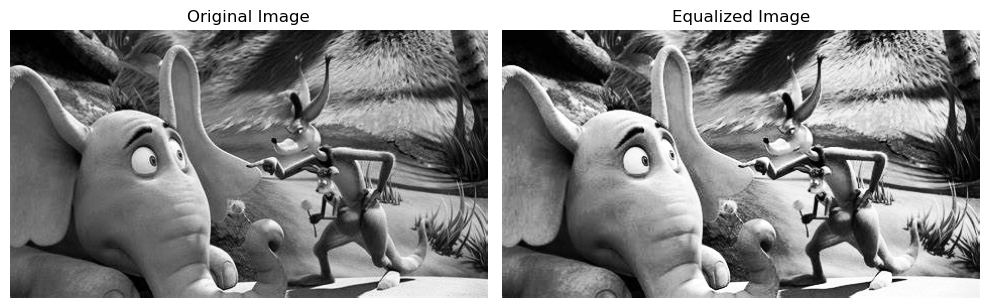

In [26]:
#5

import cv2
import matplotlib.pyplot as plt



# Apply Histogram Equalization
# Load an image in grayscale (feel free to replace with your own image)
image = cv2.imread('OIP.jpg')  # Default is BGR

# Convert the BGR image to grayscale using cv2.cvtColor
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(image)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')


axes[1].imshow(equalized_image, cmap='gray')
axes[1].set_title('Equalized Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()


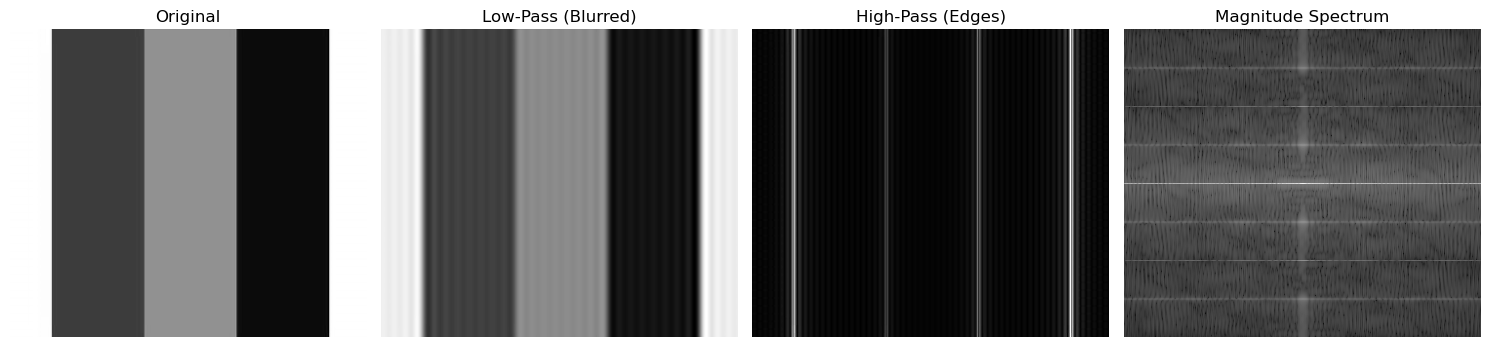

In [30]:
#6
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('colorful.jpg')  # Default is BGR

# Convert the BGR image to grayscale using cv2.cvtColor
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute the DFT (Fourier Transform) and shift to center
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

# Create frequency domain filters (low-pass & high-pass)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Low-pass filter (keeps low frequencies)
low_pass = np.zeros((rows, cols))
low_pass[crow-30:crow+30, ccol-30:ccol+30] = 1  # 60x60 central pass area

# High-pass filter (removes low frequencies)
high_pass = 1 - low_pass  # Complement of low-pass

# Apply filters in frequency domain
low_filtered = dft_shift * low_pass
high_filtered = dft_shift * high_pass

# Perform inverse DFT
low_result = np.abs(np.fft.ifft2(np.fft.ifftshift(low_filtered)))
high_result = np.abs(np.fft.ifft2(np.fft.ifftshift(high_filtered)))

# ---- Display Results (Using Object-Oriented Subplots) ----
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
titles = ["Original", "Low-Pass (Blurred)", "High-Pass (Edges)", "Magnitude Spectrum"]

# Original Image
axes[0].imshow(image, cmap="gray")
axes[0].set_title(titles[0])
axes[0].axis("off")

# Low-Pass Filtered Image (Smooth)
axes[1].imshow(low_result, cmap="gray")
axes[1].set_title(titles[1])
axes[1].axis("off")

# High-Pass Filtered Image (Edges)
axes[2].imshow(high_result, cmap="gray")
axes[2].set_title(titles[2])
axes[2].axis("off")

# Magnitude Spectrum (Visualization of Frequency Components)
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))
axes[3].imshow(magnitude_spectrum, cmap="gray")
axes[3].set_title(titles[3])
axes[3].axis("off")

plt.tight_layout()
plt.show()


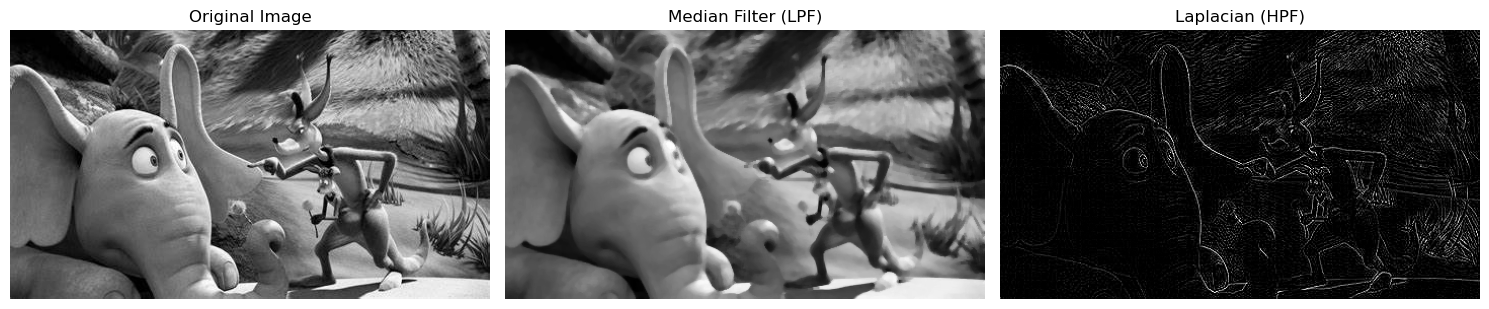

In [32]:
#7

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('OIP.jpg', cv2.IMREAD_GRAYSCALE)


# Apply Low-Pass Filtering (Median Filter)
median_filtered = cv2.medianBlur(image, 5)  # Kernel size 5

# Apply High-Pass Filtering (Laplacian)

laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])  
laplacian_filtered = cv2.filter2D(image, -1, laplacian_kernel)  # 

# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Display Mean Filtered Image

# Display Median Filtered Image
axes[1].imshow(median_filtered, cmap='gray')
axes[1].set_title("Median Filter (LPF)")
axes[1].axis('off')

# Display High-Pass Filtered Image
axes[2].imshow(laplacian_filtered, cmap='gray')
axes[2].set_title("Laplacian (HPF)")
axes[2].axis('off')

# Adjust layout and show
plt.tight_layout()
plt.show()


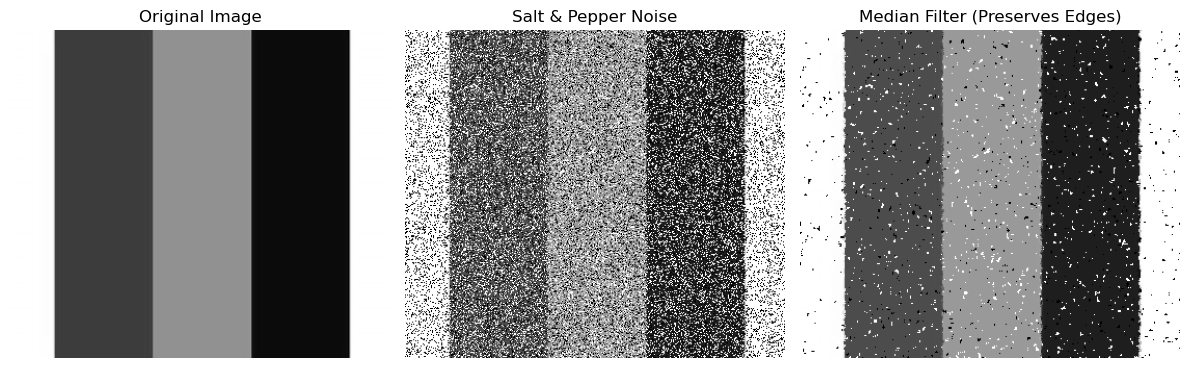

In [35]:
#8
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_salt_pepper_noise(image, salt_prob=0.3, pepper_prob=0.2):
    noisy_img = np.copy(image)
    total_pixels = image.size
    
    num_salt = int(salt_prob * total_pixels)
    rows = np.random.randint(0, image.shape[0], num_salt)  # Select row indices
    cols = np.random.randint(0, image.shape[1], num_salt)  # Select column indices

    noisy_img[rows, cols] = 255  # Set salt noise pixels to white
    
    
    num_pepper = int(pepper_prob * total_pixels)
    pepper_coords = [np.random.randint(0, i, num_pepper) for i in image.shape]   #same as above , u can do either
    noisy_img[pepper_coords[0], pepper_coords[1]] = 0  
    
    return noisy_img

# def median_filter(img, kernel_size=3):
#     h, w = img.shape
#     pad = kernel_size // 2
#     filtered_img = np.zeros_like(img)
    
#     padded_img = np.pad(img, pad, mode='constant', constant_values=0)

#     for i in range(h):
#         for j in range(w):
#             region = padded_img[i:i+kernel_size, j:j+kernel_size]
#             filtered_img[i, j] = np.median(region)

#     return filtered_img
image = cv2.imread('colorful.jpg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
noisy_img = add_salt_pepper_noise(img)
median_filtered = cv2.medianBlur(noisy_img, 3)  




fig, axes = plt.subplots(1, 3, figsize=(12, 6))  # Create 1 row, 4 columns

# Original Image
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

# Salt & Pepper Noise
axes[1].imshow(noisy_img, cmap='gray')
axes[1].set_title("Salt & Pepper Noise")
axes[1].axis("off")

# Median Filtered Image
axes[2].imshow(median_filtered, cmap='gray')
axes[2].set_title("Median Filter (Preserves Edges)")
axes[2].axis("off")

# Mean Filtered Image


# Adjust layout and show
plt.tight_layout()
plt.show()

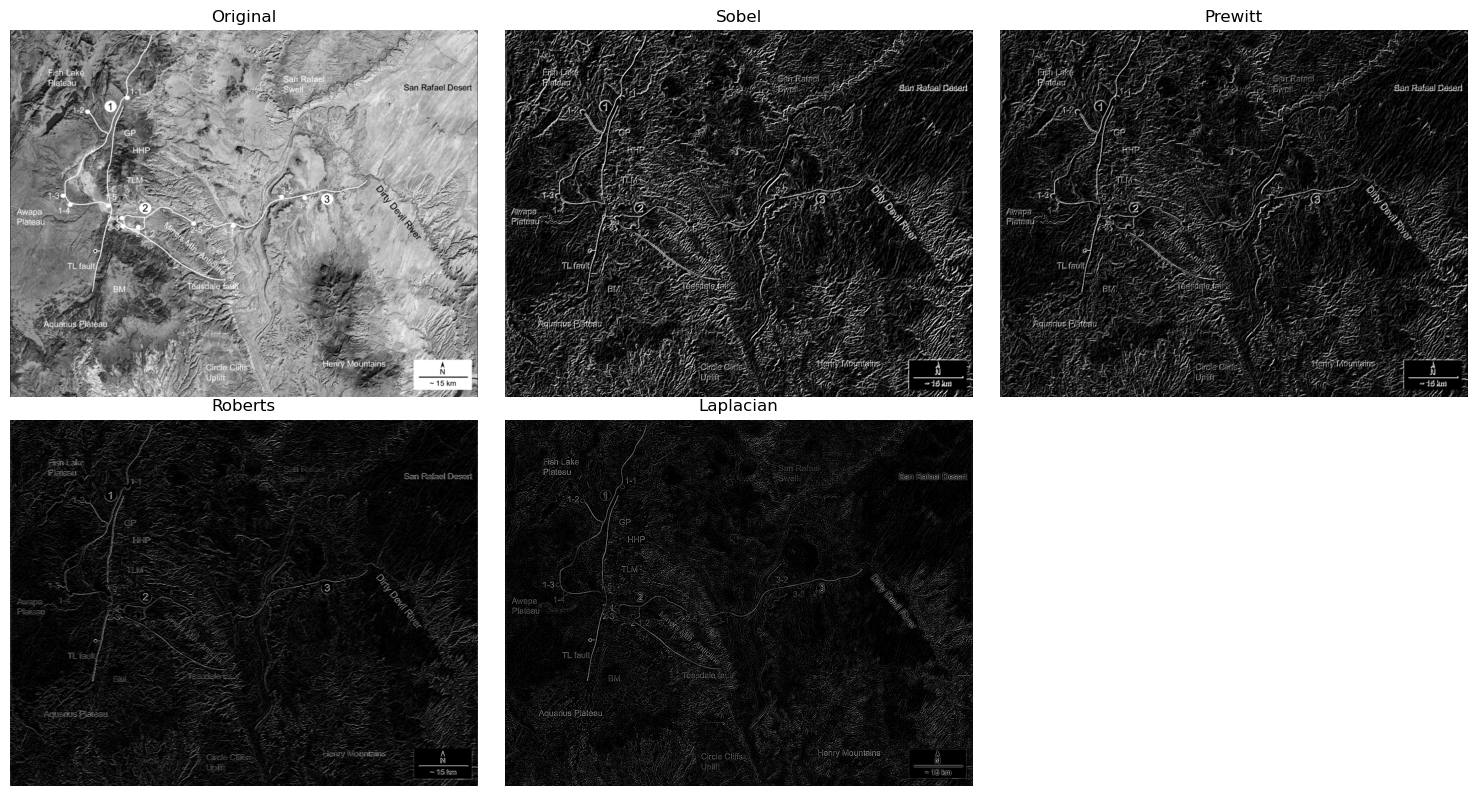

In [37]:
#9
# ========================== 1️⃣ Sobel Filter ==========================
# ➤ **Use Case**: Used in object detection, medical imaging (MRI edge detection).
# ➤ **Significance**: Enhances edges by giving more weight to central pixels.
# ➤ **Mathematical Formula**: 
# G(x, y) = sqrt(Gx² + Gy²)
# - Enhances **strong edges** while ignoring weak ones.
# - Uses weighted gradient calculations (center pixels matter more).
# - Good for detecting **sharp edges** in images, especially in medical imaging.

# ========================== 2️⃣ Prewitt Filter ==========================
# ➤ **Use Case**: Used in industrial applications for **simple edge detection**.
# ➤ **Significance**: Computationally cheaper than Sobel but less accurate.
# ➤ **Mathematical Formula**: 
# G(x, y) = sqrt(Gx² + Gy²)
# - Similar to Sobel but **does not emphasize center pixels** as much.
# - Works well for **general edge detection** in low-compute environments.
# - Used for applications with less computation power but still requiring edge detection.

# ========================== 3️⃣ Roberts Filter ==========================
# ➤ **Use Case**: Used in **real-time edge detection**, OCR (Optical Character Recognition).
# ➤ **Significance**: Fastest filter since it uses a 2×2 kernel.
# ➤ **Mathematical Formula**:
# G(x, y) = sqrt(Gx² + Gy²)
# - **Quickest** edge detector but lacks accuracy.
# - Works well for **small-scale images** (e.g., handwritten text recognition).
# - Great for fast real-time processing but not as precise as other filters.

# ========================== 4️⃣ Laplacian Filter ==========================
# ➤ **Use Case**: Used in **blob detection**, fingerprint enhancement.
# ➤ **Significance**: Detects **both edges and fine details** (but sensitive to noise).
# ➤ **Mathematical Formula**:
# L(x, y) = d²f/dx² + d²f/dy²
# - Computes **second-order derivatives**, capturing sudden intensity changes.
# - Used where both **edge & texture detection** is needed.
# - Sensitive to noise, so often used with smoothing techniques.

# Now, we will use the following Python code to implement these filters on an image.

import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("C:/Users/ARSHAN/Desktop/5th/codes/trials/s.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found! Check the file path.")

sobel_x_kernel = np.array([[-1, 0, 1], 
                           [-2, 0, 2], 
                           [-1, 0, 1]])  

sobel_y_kernel = np.array([[-1, -2, -1], 
                           [0, 0, 0], 
                           [1, 2, 1]]) 


sobel_x = cv2.filter2D(img, -1, sobel_x_kernel)
sobel_y = cv2.filter2D(img, -1, sobel_y_kernel)


sobel_mag = cv2.magnitude(sobel_x.astype(float), sobel_y.astype(float))


#previtt

prewitt_x_kernel = np.array([[-1, 0, 1], 
                             [-1, 0, 1], 
                             [-1, 0, 1]])  # X-direction

prewitt_y_kernel = np.array([[-1, -1, -1], 
                             [0, 0, 0], 
                             [1, 1, 1]])  # Y-direction

# Convolution
prewitt_x = cv2.filter2D(img, -1, prewitt_x_kernel)
prewitt_y = cv2.filter2D(img, -1, prewitt_y_kernel)

# Compute magnitude
prewitt_mag = cv2.magnitude(prewitt_x.astype(float), prewitt_y.astype(float))

# ========================== 3️⃣ Roberts Filter ==========================
roberts_x_kernel = np.array([[1, 0], 
                             [0, -1]])  # X-direction

roberts_y_kernel = np.array([[0, 1], 
                             [-1, 0]])  # Y-direction

roberts_x = cv2.filter2D(img, -1, roberts_x_kernel)
roberts_y = cv2.filter2D(img, -1, roberts_y_kernel)

roberts_mag = cv2.magnitude(roberts_x.astype(float), roberts_y.astype(float))

# ========================== 4️⃣ Laplacian Filter ==========================
laplacian_kernel = np.array([[0, -1, 0], 
                             [-1, 4, -1], 
                             [0, -1, 0]])  # 3×3 Laplacian Kernel

laplacian = cv2.filter2D(img, -1, laplacian_kernel)

# ========================== 🔹 Display Results ==========================
# Create Subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Titles for each subplot
titles = ['Original', 'Sobel', 'Prewitt', 'Roberts', 'Laplacian']
images = [img, sobel_mag, prewitt_mag, roberts_mag, laplacian]

# Display images in the subplots
for i in range(5):
    axes[i // 3, i % 3].imshow(images[i], cmap='gray')
    axes[i // 3, i % 3].set_title(titles[i])
    axes[i // 3, i % 3].axis("off")

# Remove empty subplot space
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()


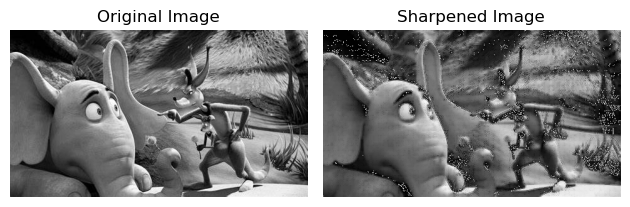

In [42]:
#10

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('OIP.jpg', 0)

# Define the Laplacian kernel for sharpening
laplacian_kernel = np.array([[0, -1, 0], 
                             [-1, 4, -1], 
                             [0, -1, 0]])

# Apply the Laplacian filter
laplacian_filtered = cv2.filter2D(image, -1, laplacian_kernel)

# Sharpen the image by subtracting the Laplacian result from the original image
sharpened_image = image - laplacian_filtered

# Display the original and sharpened images using subplots
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

plt.tight_layout()
plt.show()


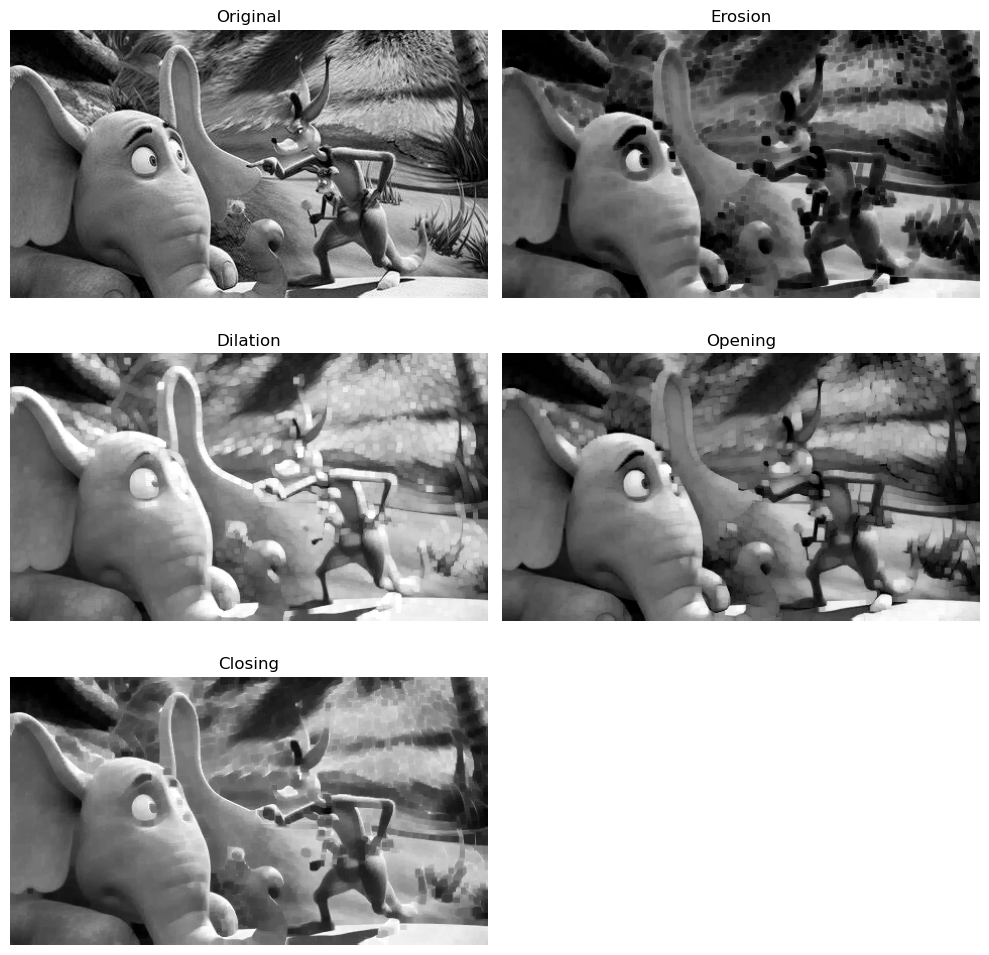

In [39]:
#11
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("OIP.jpg", 0)


kernel = np.ones((5, 5), np.uint8)

erosion = cv2.erode(image, kernel)
dilation = cv2.dilate(image, kernel)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)


fig, axes = plt.subplots(3, 2, figsize=(10, 10))



# Original Image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original")
axes[0, 0].axis('off')

# Erosion
axes[0, 1].imshow(erosion, cmap='gray')
axes[0, 1].set_title("Erosion")
axes[0, 1].axis('off')

# Dilation
axes[1, 0].imshow(dilation, cmap='gray')
axes[1, 0].set_title("Dilation")
axes[1, 0].axis('off')

# Opening
axes[1, 1].imshow(opening, cmap='gray')
axes[1, 1].set_title("Opening")
axes[1, 1].axis('off')

# Closing
axes[2, 0].imshow(closing, cmap='gray')
axes[2, 0].set_title("Closing")
axes[2, 0].axis('off')

# Remove the last empty subplot (axes[2, 1])
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


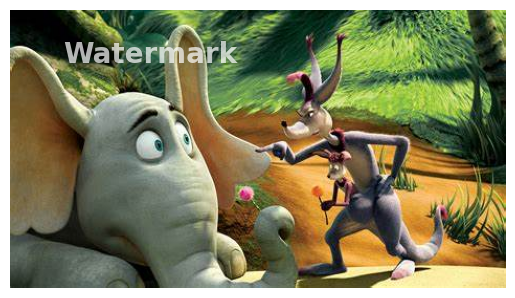

In [ ]:
#13

import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread("OIP.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# Create a figure and axis
fig, ax = plt.subplots()
ax.imshow(image)
ax.axis("off")  # Hide axes

# Add watermark text
ax.text(50, 50, "Watermark", fontsize=20, color="white", alpha=0.7, fontweight="bold")

# Save or display the image
plt.savefig("watermarked.jpg", bbox_inches="tight", dpi=300)
plt.show()


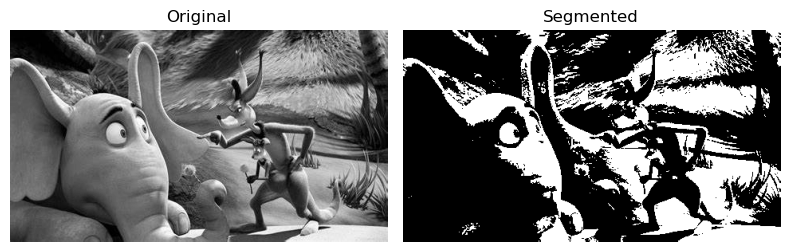

In [46]:
#12

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
image = cv2.imread('OIP.jpg', 0)

# Manual thresholding
threshold = 127
segmented = np.zeros_like(image)
segmented[image > threshold] = 255  # foreground
segmented[image <= threshold] = 0   # background

# Create subplot manually
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(segmented, cmap='gray')
axes[1].set_title("Segmented")
axes[1].axis('off')

plt.tight_layout()
plt.show()


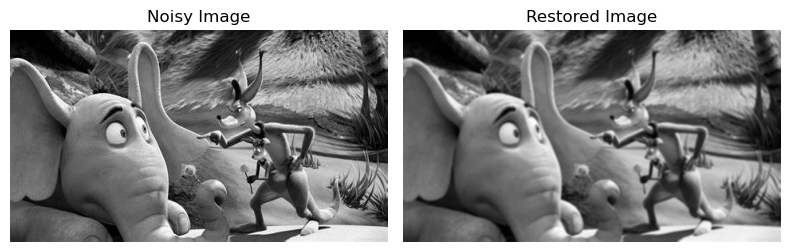

In [52]:

#14
import cv2
import matplotlib.pyplot as plt

# Load noisy image (grayscale)
image = cv2.imread('OIP.jpg', 0)

# Apply Gaussian Blur to reduce noise
restored = cv2.GaussianBlur(image, (5, 5), 0)
#restored = cv2.medianBlur(img, 3)  # Kernel size must be od, can use median blur also

# Display original and restored images using manual subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Noisy Image")
axes[0].axis('off')

axes[1].imshow(restored, cmap='gray')
axes[1].set_title("Restored Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [53]:
help(cv2.GaussianBlur)

Help on built-in function GaussianBlur:

GaussianBlur(...)
    GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
    .   @brief Blurs an image using a Gaussian filter.
    .   
    .   The function convolves the source image with the specified Gaussian kernel. In-place filtering is
    .   supported.
    .   
    .   @param src input image; the image can have any number of channels, which are processed
    .   independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
    .   @param dst output image of the same size and type as src.
    .   @param ksize Gaussian kernel size. ksize.width and ksize.height can differ but they both must be
    .   positive and odd. Or, they can be zero's and then they are computed from sigma.
    .   @param sigmaX Gaussian kernel standard deviation in X direction.
    .   @param sigmaY Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be
    .   equal to sigmaX, if both sigmas are z

C:\Users\ARSHAN\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ARSHAN\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


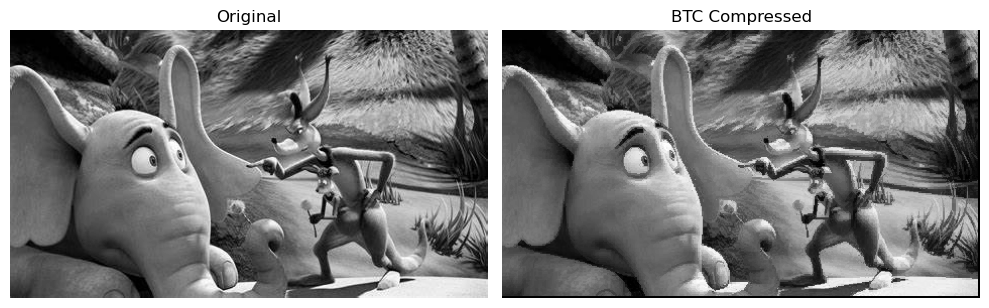

In [57]:
#15
"""Block Truncation Coding (BTC) is a simple image compression method that divides an image into non-overlapping blocks (e.g., 4x4 pixels). For each block:

Compute the mean pixel value of the block.

Divide the block into two parts:

High values: Pixels greater than or equal to the block's mean.

Low values: Pixels smaller than the mean.

Replace the high-value pixels with the mean of high values and the low-value pixels with the mean of low values.

This method reduces the amount of data by simplifying the pixel values within each block, but it's lossy (some image details are lost during compression).

BTC is simple and computationally light, but it’s less efficient compared to advanced methods like JPEG.



"""
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread("OIP.jpg", 0)

# Compressed image (same size)
compressed = np.zeros_like(img)

# Block size
bs = 4

# Loop through blocks
for i in range(0, img.shape[0] - bs, bs):
    for j in range(0, img.shape[1] - bs, bs):
        block = img[i:i+bs, j:j+bs]
        mean = np.mean(block)
        high = np.mean(block[block >= mean])
        low = np.mean(block[block < mean])
        compressed[i:i+bs, j:j+bs] = np.where(block >= mean, high, low)

# Plot using manual subplot axes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(compressed, cmap='gray')
axes[1].set_title("BTC Compressed")
axes[1].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
#16
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
image = cv2.imread('your_image.jpg', cv2.IMREAD_GRAYSCALE)

# Define Laplacian kernel (3x3)
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

# Apply the kernel using filter2D
laplacian = cv2.filter2D(image, -1, laplacian_kernel)

# Display the original and edge-detected images
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')

plt.show()
